In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import matplotlib.cm as cm

In [6]:
# load files
df = pd.read_csv('netflix_titles.csv')
# print(df.head())
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

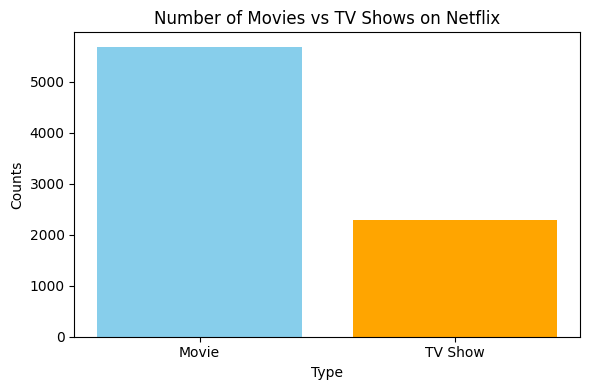

In [13]:
df = df.dropna(subset = ['type','release_year', 'rating', 'country','duration',])

type_counts = df["type"].value_counts()
# print(type_counts)
# Movie      5687
# TV Show    2283

plt.figure(figsize=(6, 4))
plt.bar(type_counts.index, type_counts.values, color = ["skyblue", "orange"])
plt.title("Number of Movies vs TV Shows on Netflix")
plt.xlabel("Type")
plt.ylabel("Counts")
plt.tight_layout()
plt.savefig("Movies_vs_TV_Shows.png")
plt.show()

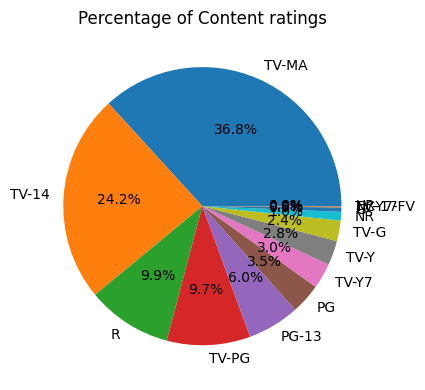

In [ ]:

# rating distribution
rating_counts = df["rating"].value_counts()
# rating_counts

plt.figure(figsize=(6, 4))
plt.pie(rating_counts, labels = rating_counts.index, autopct = "%1.1f%%")

plt.title("Percentage of Content ratings")
plt.tight_layout()
plt.savefig("content_ratings_pie.png")

plt.show()

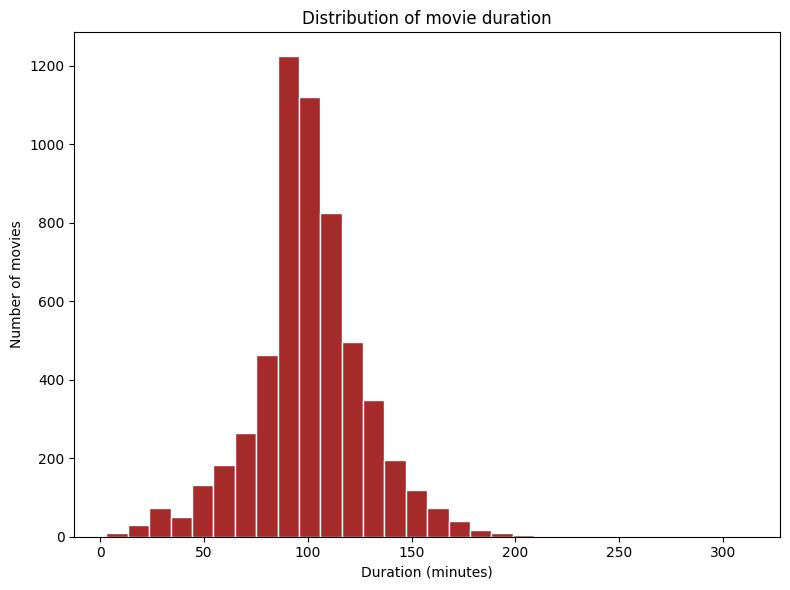

In [31]:
# movie duration distribution
# df["type"].value_counts()

movie_df = df[df["type"] == "Movie"].copy()
movie_df["duration_int"] = movie_df["duration"].str.replace(" min",'').astype(int)
# print(movie_df["duration_int"])

plt.figure(figsize=(8, 6))
plt.hist(movie_df["duration_int"], bins = 30, color = "brown", edgecolor = "white")
plt.title("Distribution of movie duration")
plt.xlabel("Duration (minutes)")
plt.ylabel("Number of movies")
plt.tight_layout()
plt.savefig("Movies_duration_hist.png")
plt.show()

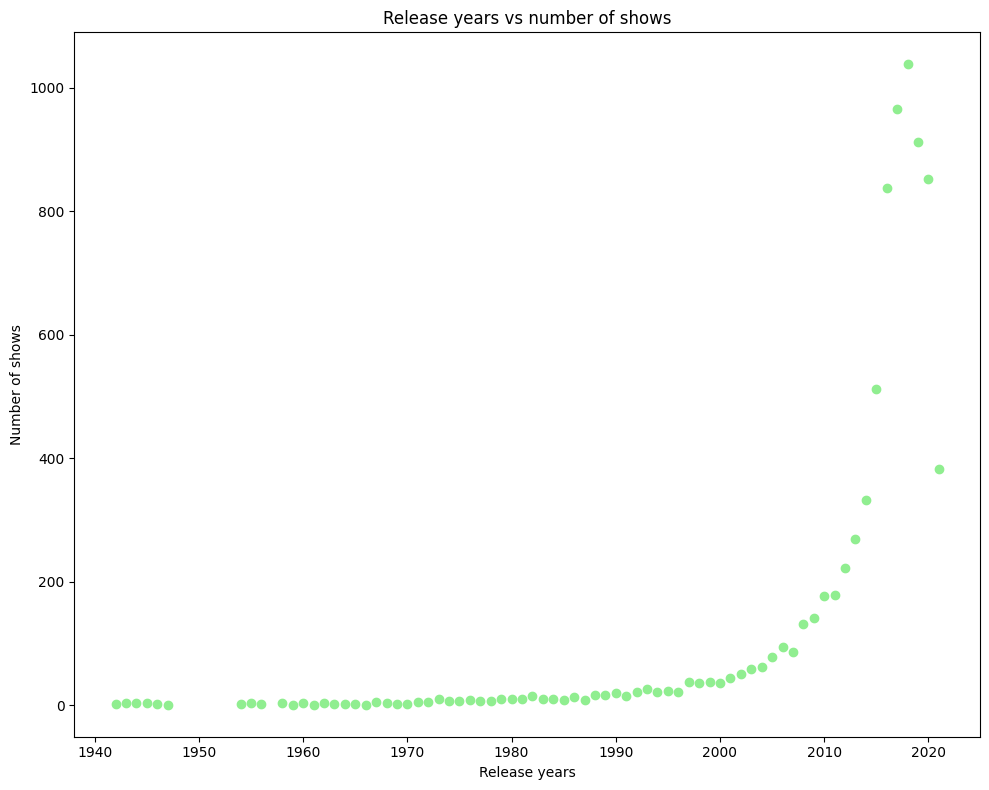

In [37]:
# release years vs number of shows

df.columns

release_count = df["release_year"].value_counts().sort_index()

plt.figure(figsize=(10, 8))

plt.scatter(release_count.index, release_count.values, color = "lightgreen")

plt.title("Release years vs number of shows")
plt.xlabel("Release years")
plt.ylabel("Number of shows")

plt.tight_layout()

plt.savefig("release_yrs_scatter.png")
plt.show()

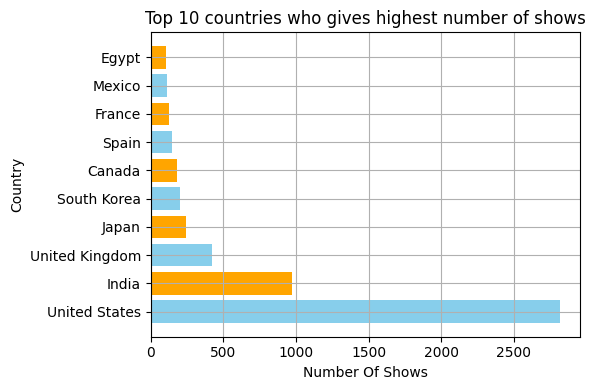

In [48]:
# top 10 countries who gives highest number of shows
df.columns

country_count = df["country"].value_counts().sort_values(ascending=False).head(10)
country_count

# horizontal barchart
plt.figure(figsize=(6, 4))
plt.barh(country_count.index, country_count.values, color = ["skyblue", "orange"])
plt.title("Top 10 countries who gives highest number of shows")
plt.xlabel("Number Of Shows")
plt.ylabel("Country")
plt.grid()
plt.tight_layout()
plt.savefig("Top_10_countries.png")
plt.show()





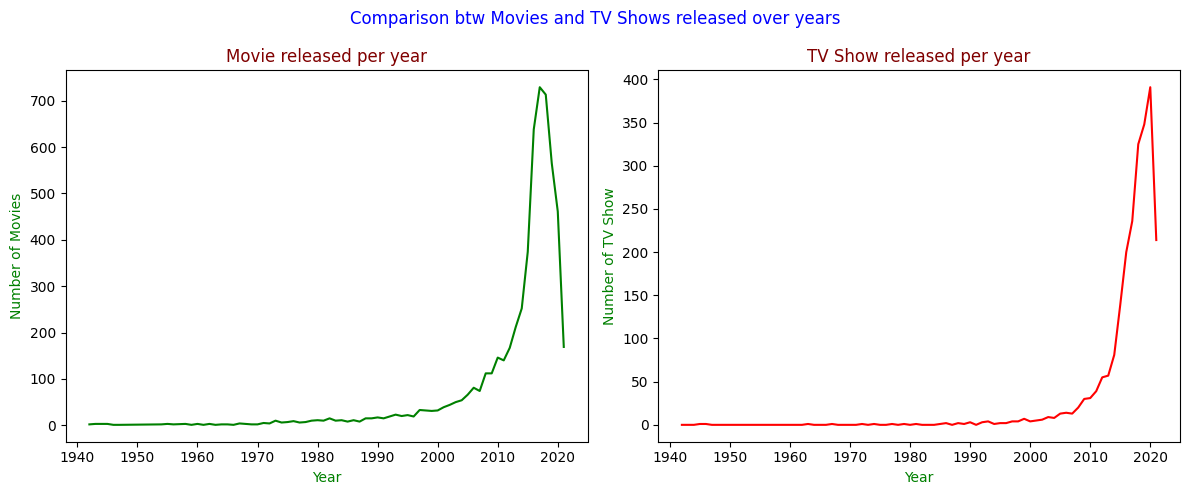

In [58]:
# counts per movies & tv-shows
# subplot

content_by_yr = df.groupby(["release_year", "type"]).size().unstack().fillna(0)

fig, ax = plt.subplots(1,2,figsize = (12,5))

# 1st subplot for movies
ax[0].plot(content_by_yr.index, content_by_yr["Movie"] , color = "green")
ax[0].set_title("Movie released per year", color = "Maroon")
ax[0].set_xlabel("Year", color = "green")
ax[0].set_ylabel("Number of Movies", color = "green")

# 2st subplot for tv shows
ax[1].plot(content_by_yr.index, content_by_yr["TV Show"] , color = "red")
ax[1].set_title("TV Show released per year", color = "Maroon")
ax[1].set_xlabel("Year", color = "green")
ax[1].set_ylabel("Number of TV Show", color = "green")

fig.suptitle("Comparison btw Movies and TV Shows released over years", color = "blue")
plt.tight_layout()
plt.savefig("Comparison_subplots.png", dpi = 300, bbox_inches = "tight")
plt.show()

In [51]:
df["type"]

0         Movie
1       TV Show
4       TV Show
7         Movie
8       TV Show
         ...   
8801      Movie
8802      Movie
8804      Movie
8805      Movie
8806      Movie
Name: type, Length: 7970, dtype: object